In [1]:
import torch
from torch import nn

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net=nn.Sequential(
            nn.Conv2d(1,6,kernel_size=5,padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.Linear(400,120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84,10)
        )
    
    def forward(self,X):
        return self.net(X)

In [2]:
net=LeNet()

In [3]:
list(net.parameters())

[Parameter containing:
 tensor([[[[ 0.0331,  0.0859, -0.1260, -0.1439,  0.1503],
           [-0.1230, -0.1801, -0.0431, -0.1816, -0.1367],
           [ 0.1150,  0.1410, -0.0735, -0.0704,  0.1277],
           [-0.0202,  0.0489,  0.1798,  0.0254, -0.0062],
           [-0.1577, -0.1916, -0.1850, -0.1279, -0.1372]]],
 
 
         [[[-0.1889, -0.1508, -0.1487,  0.0839,  0.1566],
           [-0.1317,  0.0880, -0.0950,  0.1777, -0.0198],
           [-0.1678, -0.0940,  0.1435, -0.1054,  0.0869],
           [ 0.1072,  0.0850,  0.0440,  0.1834, -0.0844],
           [ 0.1107,  0.1011, -0.1266,  0.1876, -0.1950]]],
 
 
         [[[ 0.1317, -0.1423,  0.0780,  0.1907,  0.0669],
           [-0.0441,  0.0081,  0.1469,  0.1945, -0.0146],
           [-0.0383, -0.1431,  0.0451,  0.0391, -0.1229],
           [-0.0454, -0.0901,  0.0697,  0.1007,  0.1904],
           [ 0.0399, -0.1788, -0.1510,  0.0299, -0.0036]]],
 
 
         [[[-0.0275,  0.1661,  0.1756,  0.0794,  0.0974],
           [ 0.1224, -0.0018, -

In [4]:
image_path='D:/datasets/MNIST/raw/train-images-idx3-ubyte'
label_path='D:/datasets/MNIST/raw/train-labels-idx1-ubyte'

In [9]:
%matplotlib inline
import numpy 
from matplotlib import pyplot as plt


def get_Minist(image_path,label_path):
    with open(image_path,'rb') as f:
        s=f.read()  
    magic_num=int(s[:4].hex(),16)
    image_num=int(s[4:8].hex(),16)
    w=int(s[8:12].hex(),16)
    h=int(s[12:16].hex(),16)
    image_dot = [m for m in s[16:]]
    images=numpy.array(image_dot).reshape(-1,28,28)
    with open(label_path,'rb') as f:
        s=f.read()
    ids=[ id for id in s[8:]]
    ids=numpy.asarray(ids)
    return (magic_num,image_num,w,h,images,ids)

In [10]:
def plot_images(num,images):
    plt.figure(figsize=(10,5))
    for i in range(min(num,6)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i])
    
    plt.show()
        
    return

In [11]:
_,image_num,w,h,images,ids=get_Minist(image_path,label_path)

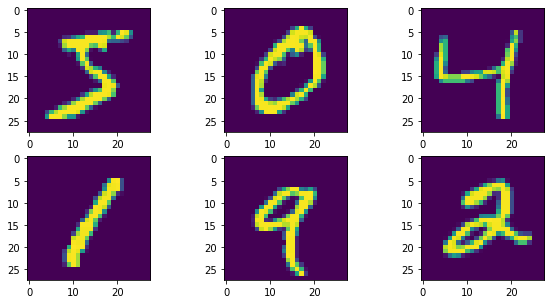

In [12]:
plot_images(10,images)

In [23]:
from torch.utils.data import DataLoader,Dataset
class MinistData(Dataset):
    def __init__(self,image_path,label_path):
        _,self.image_num,self.w,self.h,self.images,self.ids=get_Minist(image_path,label_path)
           
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self,index):
        return (images[index],ids[index])
    
    def get_Minist(image_path,label_path):
        with open(image_path,'rb') as f:
            s=f.read()  
        magic_num=int(s[:4].hex(),16)
        image_num=int(s[4:8].hex(),16)
        w=int(s[8:12].hex(),16)
        h=int(s[12:16].hex(),16)
        image_dot = [m for m in s[16:]]
        images=numpy.array(image_dot).reshape(-1,28,28)
        with open(label_path,'rb') as f:
            s=f.read()
        ids=[ id for id in s[8:]]
        ids=numpy.asarray(ids)
        return (magic_num,image_num,w,h,images,ids)
    
    def plot_images(num,images):
            plt.figure(figsize=(10,5))
            for i in range(min(num,6)):
                plt.subplot(2,3,i+1)
                plt.imshow(images[i])

            plt.show()
            return


In [24]:
def train(data_iter,net,optimizer,lr,loss_fn,max_epoch,batch_size,device):
    total_loss=0
    matrix_x,matrix_loss=[],[]
    batchs=len(data_iter)
    for epoch in range(max_epoch):
        for i,X,y_taget in enumerate(data_iter):
            optimizer.zero_grad()
            y_hat=net(X)
            loss=loss_fn(y_hat,y_taget)
            loss.sum().backward()
            optimizer.step()
            total_loss+=loss
            matrix_x.append(epoch*batchs+i+1)
            matrix_y.append(total_loss/(epoch*batchs+i+1))
            print(f'loss: {matrix_y[-1]}:{matrix_x[-1]}/{batchs*max_epoch}')
    
    plt.figure(figsize=(6,4))
    plt.plot(matrix_x,matrix_y,color='b',linewidth=1)
    plt.title('loss image')
    plt.xlabel('batch')
    plt.ylabel('loss')
    return net


In [25]:
data=MinistData(image_path,label_path)

In [26]:
data_iter=DataLoader(data,batch_size=64,shuffle=True)

In [27]:
net

LeNet(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): Sigmoid()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Sigmoid()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
net=net.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parametersa(),lr=0.001)
train(data_iter,net,optimizer,lr=0.001,loss_fn=loss_fn,max_epoch=5,device=device)